<a href="https://colab.research.google.com/github/badboycherry/windforce/blob/main/20231205_%EA%B6%8C%EB%AF%BC%EA%B2%BD_1%EC%A1%B0%ED%8C%80%ED%94%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 한글화
import matplotlib.pyplot as plt
!apt-get update -qq
!apt-get install fonts-nanum* -qq
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf',  name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'})
plt.rcParams['axes.unicode_minus'] = False # 한글화에서 - 부호 처리

Selecting previously unselected package fonts-nanum.
(Reading database ... 120882 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


# RandomForestRegressor

# 필요한 라이브러리 및 데이터 불러오기:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error

# 데이터 로드
weather_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/최종기상데이터.csv', encoding='EUC-KR')
wind_power_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/최종발전량데이터.csv', encoding='EUC-KR')



In [ ]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9864 entries, 0 to 9863
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   지점명                  9864 non-null   object 
 1   일시                   9864 non-null   object 
 2   평균기온(°C)             9864 non-null   float64
 3   최저기온(°C)             9864 non-null   float64
 4   최저기온 시각(hhmi)        9864 non-null   float64
 5   최고기온(°C)             9864 non-null   float64
 6   최고기온 시각(hhmi)        9864 non-null   float64
 7   강수 계속시간(hr)          4626 non-null   float64
 8   10분 최다 강수량(mm)       3600 non-null   float64
 9   10분 최다강수량 시각(hhmi)   2660 non-null   float64
 10  1시간 최다강수량(mm)        3601 non-null   float64
 11  1시간 최다 강수량 시각(hhmi)  2711 non-null   float64
 12  일강수량(mm)             5767 non-null   float64
 13  최대 순간 풍속(m/s)        9864 non-null   float64
 14  최대 순간 풍속 풍향(16방위)    9864 non-null   float64
 15  최대 순간풍속 시각(hhmi)     9864 non-null   f

# 데이터 전처리 및 병합

In [ ]:
# 'date' 열을 datetime 형식으로 변환
wind_power_df['date'] = pd.to_datetime(wind_power_df['date'])
# 날짜에서 날짜 부분만 추출
wind_power_df['date'] = wind_power_df['date'].dt.date

# 날짜와 지역별로 데이터를 그룹화하고 각 날짜에 대한 에너지 값의 평균을 계산
average_daily_energy_df = wind_power_df.groupby(['date', 'region'])['energy'].mean().reset_index()

# '일시' 열을 datetime 형식으로 변환
weather_df['일시'] = pd.to_datetime(weather_df['일시'])
# '일시'에서 날짜 부분만 추출
weather_df['일시'] = weather_df['일시'].dt.date

# 데이터 병합
merged_df = pd.merge(weather_df, average_daily_energy_df, left_on=['지점명', '일시'], right_on=['region', 'date'], how='inner')

# 평균으로 대체
merged_df.fillna(merged_df.mean(), inplace=True)

<ipython-input-6-c598248ee192>:18: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged_df.fillna(merged_df.mean(), inplace=True)


# '일시'와 'region'에 따른 에너지 평균 시각화 (점 그래프)
plt.figure(figsize=(15, 8))

In [ ]:
# '일시'와 'region'에 따른 에너지 평균 시각화 (점 그래프)
plt.figure(figsize=(15, 8))
sns.scatterplot(x='date', y='energy', hue='region', data=average_daily_energy_df)
plt.title('Average Daily Energy by Date and Region')
plt.show()

NameError: ignored

<Figure size 1500x800 with 0 Axes>

# 각 날짜별 기상 정보와 에너지 값 시각화 (Pairplot)

In [ ]:
plt.figure(figsize=(15, 8))
sns.pairplot(merged_df[['평균기온(°C)', '최저기온(°C)', '최고기온(°C)', '일강수량(mm)', '평균 풍속(m/s)', 'energy']], kind='scatter')
plt.suptitle('Pairplot of Weather Features and Energy')
plt.show()

NameError: ignored

<Figure size 1500x800 with 0 Axes>

# 상관 관계 행렬 히트맵

In [ ]:
# 모든 변수를 포함한 상관 행렬 계산
all_correlation_matrix = merged_df.corr()

# 히트맵 시각화
plt.figure(figsize=(24, 18))
sns.heatmap(all_correlation_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of All Variables (Color Only)')
plt.show()


<ipython-input-10-a856e9d5cd6d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  all_correlation_matrix = merged_df.corr()


NameError: ignored

<Figure size 2400x1800 with 0 Axes>

#모델 학습 및 평가

 - RandomForest와 ExtraTrees의 교차 검증 결과가 단일 모델의 결과보다 더 크게 나타남.
 - 이는 교차 검증이 모델의 일반화 성능을 더 정확하게 평가하므로, 단일 모델의 성능보다 조금 더 보수적으로 평가되었다고 볼 수 있다.
 - 하지만 오차범위가 큰 편이므로, 모델의 성능을 향상시키기 위해 추가적인 튜닝이나 다른 모델을 고려해볼 필요가 있음.

In [ ]:
# Features와 Target 설정
features = ['평균기온(°C)', '최저기온(°C)', '최고기온(°C)', '일강수량(mm)', '평균 풍속(m/s)', '지점명']
target = 'energy'

X = merged_df[features]
y = merged_df[target]

# 지역 정보를 숫자로 인코딩
X = pd.get_dummies(X, columns=['지점명'])

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 표준 스케일러 사용
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# RandomForest 모델 생성 및 훈련
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# ExtraTrees 모델 생성 및 훈련
et_model = ExtraTreesRegressor(random_state=42)
et_model.fit(X_train_scaled, y_train)

# 테스트 세트에 대한 예측
rf_pred = rf_model.predict(X_test_scaled)
et_pred = et_model.predict(X_test_scaled)

# 평가 지표 출력
rf_rmse = mean_squared_error(y_test, rf_pred, squared=False)
et_rmse = mean_squared_error(y_test, et_pred, squared=False)

print("RandomForest RMSE:", rf_rmse)
print("ExtraTrees RMSE:", et_rmse)

# RandomForest에 대한 교차 검증
rf_cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
rf_cv_rmse = (-rf_cv_scores.mean())**0.5
print("RandomForest 교차검증 RMSE:", rf_cv_rmse)

# ExtraTrees에 대한 교차 검증
et_cv_scores = cross_val_score(et_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
et_cv_rmse = (-et_cv_scores.mean())**0.5
print("ExtraTrees 교차검증 RMSE:", et_cv_rmse)

RandomForest RMSE: 29412.55087147453
ExtraTrees RMSE: 29664.894203287182
RandomForest 교차검증 RMSE: 30319.32452432983
ExtraTrees 교차검증 RMSE: 30872.06482765922


# ExtraTrees 하이퍼파라미터 튜닝
- 튜닝후
- ExtraTreesRegressor RMSE after tuning: 29118.381266133394

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# ExtraTreesRegressor 튜닝을 위한 하이퍼파라미터 분포 설정
param_dist_et = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20],
    'min_samples_split': randint(2, 10)
}

# 랜덤 서치 수행
random_search_et = RandomizedSearchCV(
    ExtraTreesRegressor(random_state=42),
    param_distributions=param_dist_et,
    n_iter=10,  # 시도할 조합의 수
    cv=5
)
random_search_et.fit(X_train_scaled, y_train)

# 최적의 하이퍼파라미터 출력
print("Best Hyperparameters for ExtraTreesRegressor:", random_search_et.best_params_)

# 최적의 하이퍼파라미터로 모델 생성 및 훈련
best_et_model = ExtraTreesRegressor(random_state=42, **random_search_et.best_params_)
best_et_model.fit(X_train_scaled, y_train)

# 테스트 세트에 대한 예측
et_pred_tuned = best_et_model.predict(X_test_scaled)

# 평가 지표 출력
et_rmse_tuned = mean_squared_error(y_test, et_pred_tuned, squared=False)
print("ExtraTreesRegressor RMSE after tuning:", et_rmse_tuned)


Best Hyperparameters for ExtraTreesRegressor: {'max_depth': None, 'min_samples_split': 8, 'n_estimators': 102}
ExtraTreesRegressor RMSE after tuning: 29088.87678100343


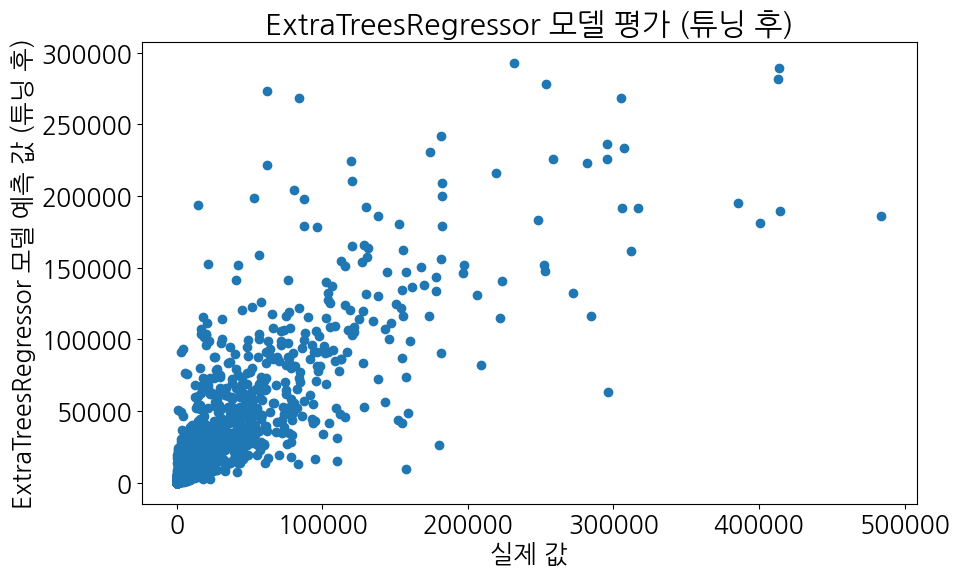

In [ ]:
# ExtraTreesRegressor 모델 성능 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, et_pred_tuned)
plt.xlabel('실제 값')
plt.ylabel('ExtraTreesRegressor 모델 예측 값 (튜닝 후)')
plt.title('ExtraTreesRegressor 모델 평가 (튜닝 후)')
plt.show()

# RandomForest 하이퍼파라미터 튜닝

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist_rf = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20],
    'min_samples_split': randint(2, 10)
}

random_search_rf = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_distributions=param_dist_rf, n_iter=10, cv=5)
random_search_rf.fit(X_train_scaled, y_train)

print("Best Hyperparameters for RandomForest:", random_search_rf.best_params_)


Best Hyperparameters for RandomForest: {'max_depth': 10, 'min_samples_split': 8, 'n_estimators': 97}


- 튜닝 후
RandomForest RMSE: 28976.503337763726

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist_rf = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20],
    'min_samples_split': randint(2, 10)
}

random_search_rf = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_distributions=param_dist_rf, n_iter=10, cv=5)
random_search_rf.fit(X_train_scaled, y_train)

print("Best Hyperparameters for RandomForest:", random_search_rf.best_params_)

# 최적의 하이퍼파라미터 출력
print("Best Hyperparameters for RandomForest:", random_search_rf.best_params_)

# 최적의 하이퍼파라미터로 RandomForest 모델 생성 및 훈련
best_rf_model = RandomForestRegressor(random_state=42, **random_search_rf.best_params_)
best_rf_model.fit(X_train_scaled, y_train)

# 테스트 세트에 대한 예측
rf_pred = best_rf_model.predict(X_test_scaled)

# 평가 지표 출력
rf_rmse = mean_squared_error(y_test, rf_pred, squared=False)
print("RandomForest RMSE:", rf_rmse)


Best Hyperparameters for RandomForest: {'max_depth': 20, 'min_samples_split': 9, 'n_estimators': 166}
Best Hyperparameters for RandomForest: {'max_depth': 20, 'min_samples_split': 9, 'n_estimators': 166}
RandomForest RMSE: 29181.674057145756


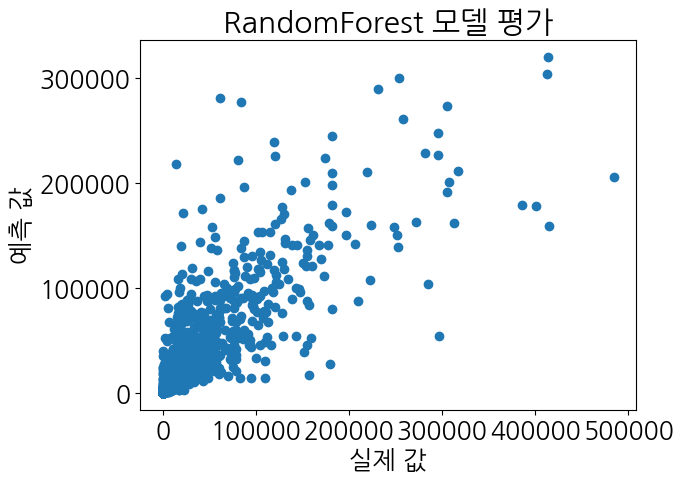

In [ ]:
plt.scatter(y_test, rf_pred)
plt.xlabel('실제 값')
plt.ylabel('예측 값')
plt.title('RandomForest 모델 평가')
plt.show()


# GradientBoostingRegressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# GradientBoostingRegressor 모델 생성 및 훈련
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train_scaled, y_train)

# 테스트 세트에 대한 예측
gb_pred = gb_model.predict(X_test_scaled)

# 평가 지표 출력
gb_rmse = mean_squared_error(y_test, gb_pred, squared=False)

print("GradientBoostingRegressor RMSE:", gb_rmse)


GradientBoostingRegressor RMSE: 29373.364588334065


# GradientBoostingRegressor 하이퍼파라미터튜닝
- 튜닝 후
- GradientBoostingRegressor RMSE: 29416.051653052407

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# GradientBoostingRegressor에 대한 랜덤 서치의 파라미터 분포 설정
param_dist_gb = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 10)
}

# 랜덤 서치 수행
random_search_gb = RandomizedSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_distributions=param_dist_gb,
    n_iter=10,  # 시도할 조합의 수
    cv=5
)
random_search_gb.fit(X_train_scaled, y_train)

# 최적의 하이퍼파라미터 출력
print("Best Hyperparameters for GradientBoostingRegressor:", random_search_gb.best_params_)

# 최적의 하이퍼파라미터로 모델 생성 및 훈련
best_gb_model = GradientBoostingRegressor(random_state=42, **random_search_gb.best_params_)
best_gb_model.fit(X_train_scaled, y_train)

# 테스트 세트에 대한 예측
gb_pred = best_gb_model.predict(X_test_scaled)

# 평가 지표 출력
gb_rmse = mean_squared_error(y_test, gb_pred, squared=False)
print("GradientBoostingRegressor RMSE:", gb_rmse)


Best Hyperparameters for GradientBoostingRegressor: {'learning_rate': 0.047863890957759975, 'max_depth': 5, 'n_estimators': 113}
GradientBoostingRegressor RMSE: 28687.830115749493


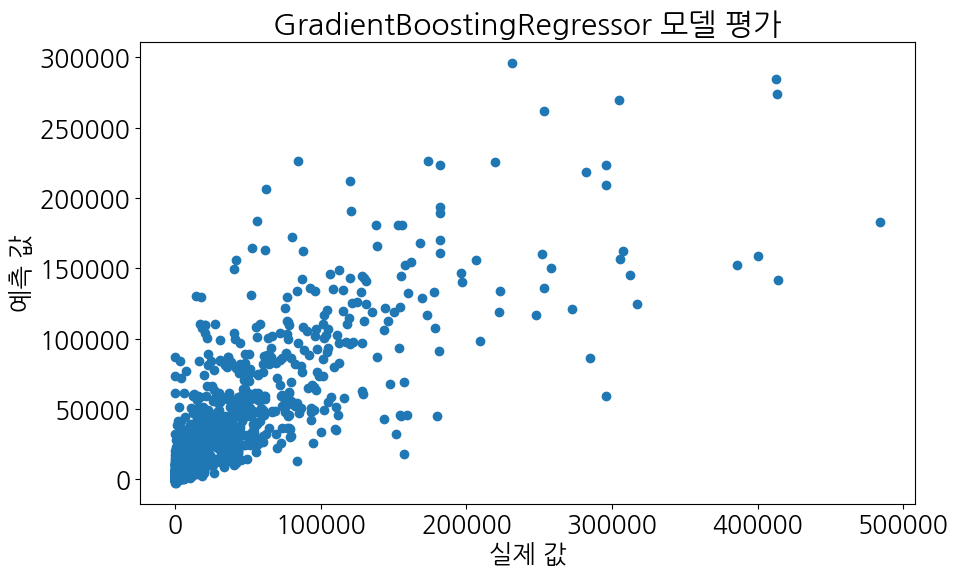

In [ ]:
# 산점도
plt.figure(figsize=(10, 6))
plt.scatter(y_test, gb_pred)
plt.xlabel('실제 값')
plt.ylabel('예측 값')
plt.title('GradientBoostingRegressor 모델 평가')
plt.show()

#XGBRegressor와 LGBMRegressor

In [ ]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# XGBRegressor 모델 생성 및 훈련
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# LGBMRegressor 모델 생성 및 훈련
lgbm_model = LGBMRegressor(random_state=42)
lgbm_model.fit(X_train_scaled, y_train)

# 각 모델에 대한 테스트 세트 예측
xgb_pred = xgb_model.predict(X_test_scaled)
lgbm_pred = lgbm_model.predict(X_test_scaled)

# 각 모델에 대한 평가 지표 출력
xgb_rmse = mean_squared_error(y_test, xgb_pred, squared=False)
lgbm_rmse = mean_squared_error(y_test, lgbm_pred, squared=False)

print("XGBRegressor RMSE:", xgb_rmse)
print("LGBMRegressor RMSE:", lgbm_rmse)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001101 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1302
[LightGBM] [Info] Number of data points in the train set: 6596, number of used features: 14
[LightGBM] [Info] Start training from score 26942.647089
XGBRegressor RMSE: 31344.909801763104
LGBMRegressor RMSE: 29961.083641092646


# XGBRegressor와 LGBMRegressor 하이퍼파라미터 튜닝

- 튜닝 후
- LGBMRegressor RMSE 평가 지표: 30535.980303650966  
LGBMRegressor RMSE: 30017.11726894108
LGBMRegressor RMSE 평가 지표: 30535.980303650966
- XGBRegressor RMSE 평가 지표: 30092.00219842597

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# XGBoost 튜닝을 위한 하이퍼파라미터 분포 설정
param_dist_xgb = {
    'n_estimators': randint(50, 200),
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 1, 5]
}

# RandomizedSearchCV를 통한 튜닝
random_search_xgb = RandomizedSearchCV(XGBRegressor(random_state=42), param_distributions=param_dist_xgb, n_iter=10, cv=5)
random_search_xgb.fit(X_train_scaled, y_train)

# 최적의 하이퍼파라미터 출력
print("Best Hyperparameters for XGBRegressor:", random_search_xgb.best_params_)

# 최적의 하이퍼파라미터로 XGBRegressor 모델 생성 및 훈련
best_xgb_model = XGBRegressor(random_state=42, **random_search_xgb.best_params_)
best_xgb_model.fit(X_train_scaled, y_train)

# 테스트 세트에 대한 예측
xgb_pred = best_xgb_model.predict(X_test_scaled)

# 평가 지표 출력
xgb_rmse = mean_squared_error(y_test, xgb_pred, squared=False)
print("XGBRegressor RMSE:", xgb_rmse)


# LightGBM 튜닝을 위한 하이퍼파라미터 분포 설정
param_dist_lgbm = {
    'n_estimators': randint(50, 200),
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'reg_alpha': [0, 1, 5],
    'reg_lambda': [0, 1, 5]
}

# RandomizedSearchCV를 통한 튜닝
random_search_lgbm = RandomizedSearchCV(LGBMRegressor(random_state=42), param_distributions=param_dist_lgbm, n_iter=10, cv=5)
random_search_lgbm.fit(X_train_scaled, y_train)

# 최적의 하이퍼파라미터 출력
print("Best Hyperparameters for LGBMRegressor:", random_search_lgbm.best_params_)

# 최적의 하이퍼파라미터로 LGBMRegressor 모델 생성 및 훈련
best_lgbm_model = LGBMRegressor(random_state=42, **random_search_lgbm.best_params_)
best_lgbm_model.fit(X_train_scaled, y_train)

# 테스트 세트에 대한 예측
lgbm_pred = best_lgbm_model.predict(X_test_scaled)

# 평가 지표 출력
lgbm_rmse = mean_squared_error(y_test, lgbm_pred, squared=False)
print("LGBMRegressor RMSE:", lgbm_rmse)


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [ ]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# XGBoost 튜닝 결과를 기반으로 모델 생성
best_xgb_model = XGBRegressor(random_state=42, n_estimators=152, learning_rate=0.1, max_depth=7, subsample=1.0, colsample_bytree=1.0, gamma=1)
best_xgb_model.fit(X_train_scaled, y_train)

# 테스트 세트에 대한 예측
xgb_pred = best_xgb_model.predict(X_test_scaled)

# 평가 지표 출력
xgb_rmse = mean_squared_error(y_test, xgb_pred, squared=False)
print("XGBRegressor RMSE 평가 지표:", xgb_rmse)

# LightGBM 튜닝 결과를 기반으로 모델 생성
best_lgbm_model = LGBMRegressor(random_state=42, n_estimators=159, learning_rate=0.2, max_depth=7, subsample=0.8, colsample_bytree=0.9, reg_alpha=1, reg_lambda=1)
best_lgbm_model.fit(X_train_scaled, y_train)

# 테스트 세트에 대한 예측
lgbm_pred = best_lgbm_model.predict(X_test_scaled)

# 평가 지표 출력
lgbm_rmse = mean_squared_error(y_test, lgbm_pred, squared=False)
print("LGBMRegressor RMSE 평가 지표:", lgbm_rmse)


XGBRegressor RMSE 평가 지표: 30092.00219842597
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001137 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1302
[LightGBM] [Info] Number of data points in the train set: 6596, number of used features: 14
[LightGBM] [Info] Start training from score 26942.647089
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

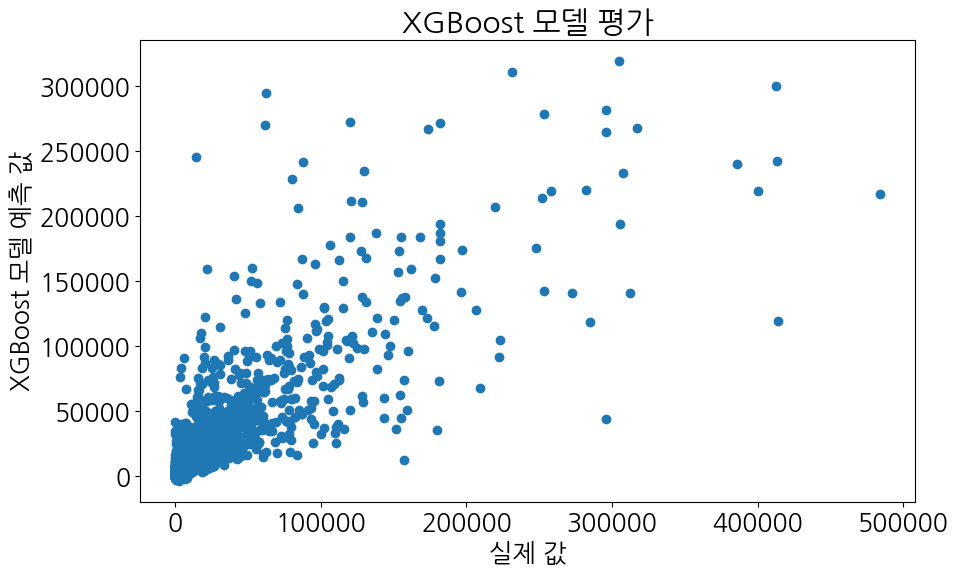

In [ ]:
# XGBoost 모델 성능 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, xgb_pred)
plt.xlabel('실제 값')
plt.ylabel('XGBoost 모델 예측 값')
plt.title('XGBoost 모델 평가')
plt.show()

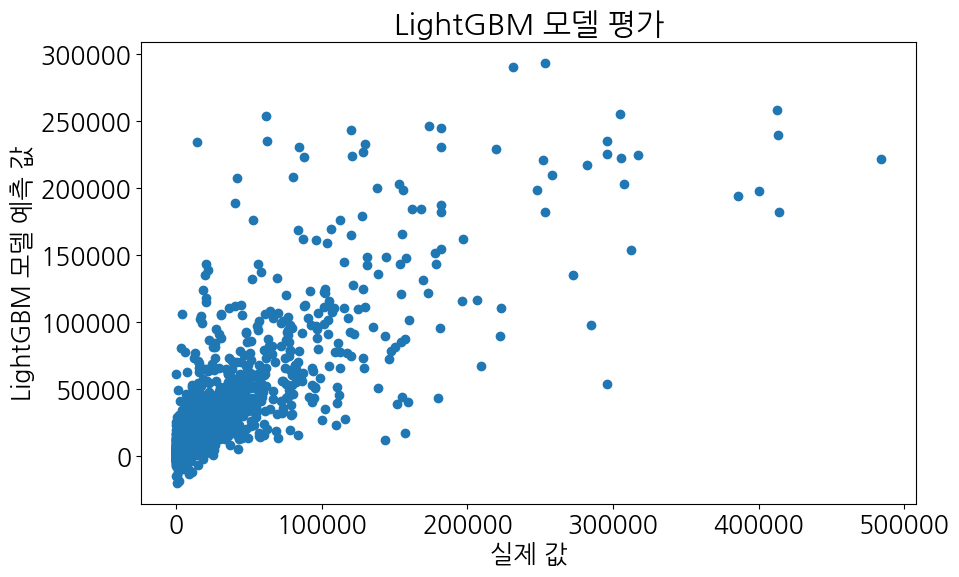

In [ ]:
# LightGBM 모델 성능 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lgbm_pred)
plt.xlabel('실제 값')
plt.ylabel('LightGBM 모델 예측 값')
plt.title('LightGBM 모델 평가')
plt.show()

# 앙상블
- 앙상블하여 결과를 결합해볼 수 있음.
- 이전에 RandomForestRegressor와 ExtraTreesRegressor로 앙상블을 수행한 것처럼, 여러 모델의 예측 결과를 가중 평균하여 최종 예측값을 생성할 수 있음
- 이를 통해 각 모델의 강점을 결합하여 높은 성능을 기대할 수 있음.

- 앙상블 모델의 RMSE가 기존 개별 모델보다 더 낮게 나왔음.
- 이는 여러 모델을 조합함으로써 전체적인 성능이 향상되었다는 것을 나타냄.
- 결론 - > 앙상블은 서로 다른 모델들의 예측을 결합하여 더욱 강력한 예측 모델을 형성하는 데 도움이 될 수 있다.

In [ ]:
# 각 모델의 예측 결과
rf_pred = best_rf_model.predict(X_test_scaled)
et_pred = best_et_model.predict(X_test_scaled)
gb_pred = best_gb_model.predict(X_test_scaled)
xgb_pred = best_xgb_model.predict(X_test_scaled)
lgbm_pred = best_lgbm_model.predict(X_test_scaled)

# 앙상블을 위한 가중 평균 수행
ensemble_pred = (rf_pred + et_pred + gb_pred + xgb_pred + lgbm_pred) / 5

# 앙상블 모델의 RMSE 계산
ensemble_rmse = mean_squared_error(y_test, ensemble_pred, squared=False)
print("Ensemble RMSE:", ensemble_rmse)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Ensemble RMSE: 28888.315854554607


# 앙상블 모델의 R-squared

In [ ]:
from sklearn.metrics import r2_score

# 앙상블 모델의 R-squared 계산
ensemble_r2 = r2_score(y_test, ensemble_pred)
print("Ensemble R-squared:", ensemble_r2)


Ensemble R-squared: 0.6765038325124269


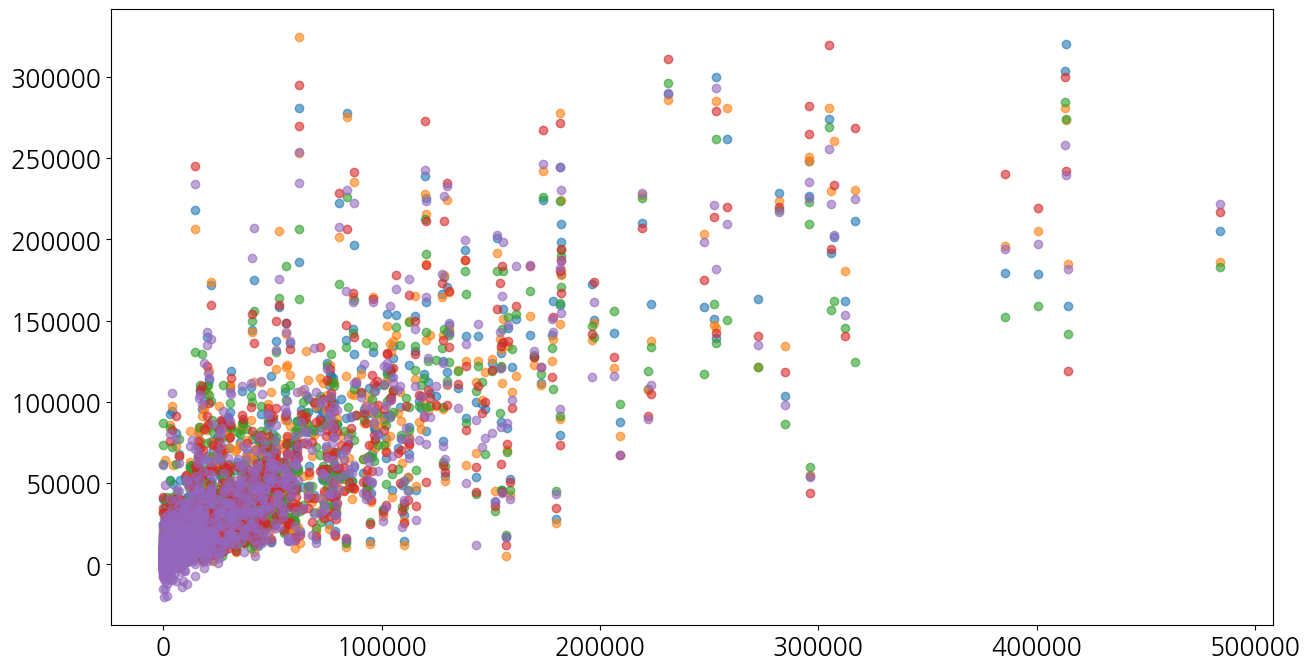

In [ ]:
# 다섯 모델 및 앙상블 모델의 예측 결과 시각화
plt.figure(figsize=(15, 8))

# 개별 모델들의 예측값
plt.scatter(y_test, rf_pred, label='RandomForest', alpha=0.6)
plt.scatter(y_test, et_pred, label='ExtraTrees', alpha=0.6)
plt.scatter(y_test, gb_pred, label='GradientBoosting', alpha=0.6)
plt.scatter(y_test, xgb_pred, label='XGBoost', alpha=0.6)
plt.scatter(y_test, lgbm_pred, label='LightGBM', alpha=0.6)






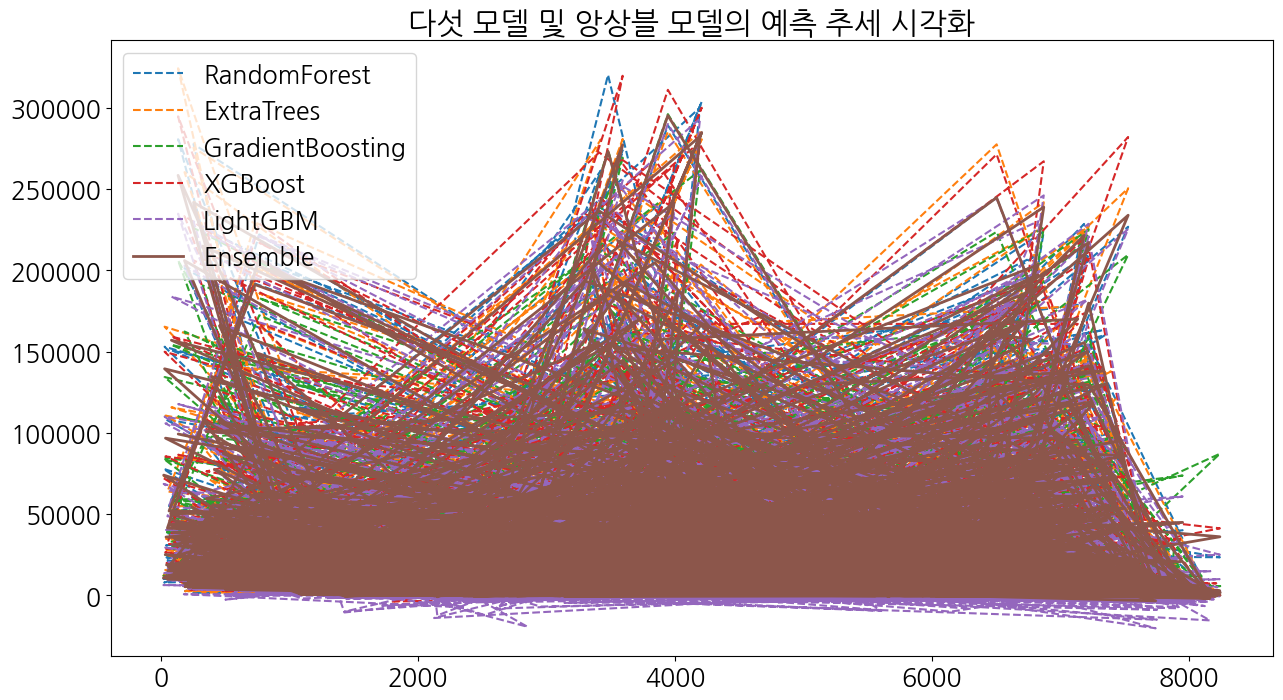

In [ ]:
# 시간에 따른 예측값 추세 시각화
plt.figure(figsize=(15, 8))
plt.plot(y_test.index, rf_pred, label='RandomForest', linestyle='--')
plt.plot(y_test.index, et_pred, label='ExtraTrees', linestyle='--')
plt.plot(y_test.index, gb_pred, label='GradientBoosting', linestyle='--')
plt.plot(y_test.index, xgb_pred, label='XGBoost', linestyle='--')
plt.plot(y_test.index, lgbm_pred, label='LightGBM', linestyle='--')
plt.plot(y_test.index, ensemble_pred, label='Ensemble', linestyle='-', linewidth=2)
plt.legend()
plt.title('다섯 모델 및 앙상블 모델의 예측 추세 시각화')
plt.show()


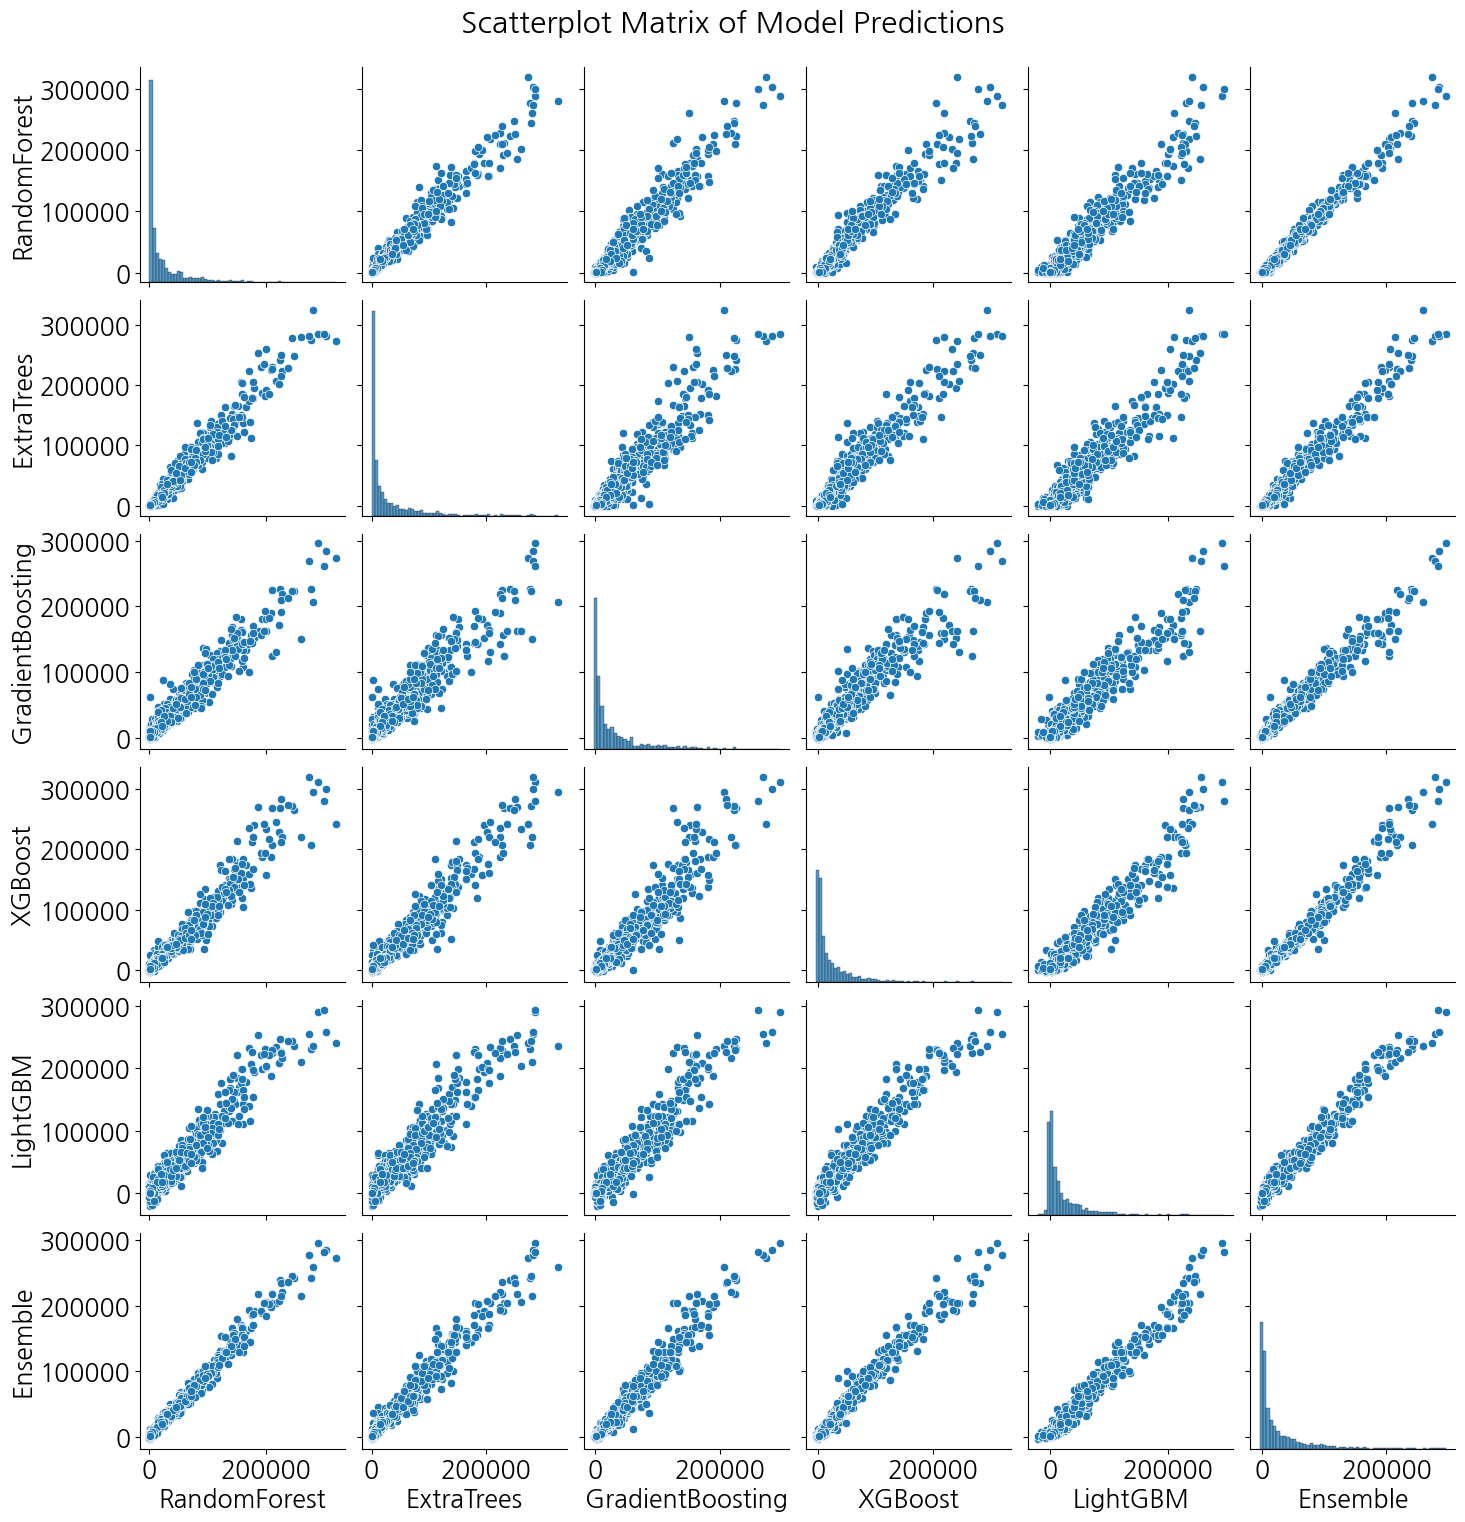

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 각 모델의 예측값과 앙상블 예측값을 데이터프레임으로 변환
ensemble_df = pd.DataFrame({
    'RandomForest': rf_pred,
    'ExtraTrees': et_pred,
    'GradientBoosting': gb_pred,
    'XGBoost': xgb_pred,
    'LightGBM': lgbm_pred,
    'Ensemble': ensemble_pred
})

# 산점도 행렬과 회귀선
sns.pairplot(ensemble_df, height=2.5)
plt.suptitle('Scatterplot Matrix of Model Predictions', y=1.02)
plt.show()
